# ТМО. Лабораторная работа № 1

## Разведочный анализ данных. Исследование и визуализация данных.

### 1) Текстовое описание набора данных

В качестве набора данных я использовал набор данных по обзору самых переполненных аэропортов в период с 2016 по 2020 год - 
https://www.kaggle.com/datasets/khaiid/most-crowded-airports

Датасет состоит из файлов:

1. Airports.csv - csv-файл, содержащий данные по этому датасету.

Каждый файл содержит следующие колонки:

1. Рейтинг - Рейтинг аэропортов за этот год. Тип integer64.

2. Аэропорт - Название аэропорта. Тип object.

3. Местоположение - Расположение аэропорта. Тип object.

4. Страна - Страна аэропорта. Тип object.

5. Код - Код аэропорта (IATA/ICAO). Тип object.

6. Пассажиры - Общее количество пассажиров. Тип integer64.

7. Год - Год составления рейтинга. Тип 64. 

## Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Загрузка данных

In [2]:
df = pd.read_csv('Airports.csv')

### 2) Основные характеристики датасета

In [3]:
df.head()

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020


Выведем первые 5 строк из выбранного датасета.

In [4]:
df.shape

(250, 7)

Выведем размер датасета - по итогу получилось 250 строк и 7 колонок:

In [5]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 250


In [6]:
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего колонок: 7


In [7]:
df.columns

Index(['Rank', 'Airport', 'Location', 'Country', 'Code', 'Passengers', 'Year'], dtype='object')

Выведем список колонок.

In [8]:
df.dtypes

Rank           int64
Airport       object
Location      object
Country       object
Code          object
Passengers     int64
Year           int64
dtype: object

Выведем список колонок с типами данных.

In [9]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

Rank - 0
Airport - 0
Location - 0
Country - 0
Code - 0
Passengers - 0
Year - 0


Проверил количество пустых значений по колонкам. Количество пустых значений означает, что все значения по этим колонкам заполнены.

In [10]:
df.describe()

,Rank,Passengers,Year
count,250.000000,2.500000e+02,250.000000
mean,25.500000,5.148617e+07,2018.000000
std,14.459818,2.002711e+07,1.417051
min,1.000000,1.589289e+07,2016.000000
25%,13.000000,4.189389e+07,2017.000000
50%,25.500000,4.759559e+07,2018.000000
75%,38.000000,6.449894e+07,2019.000000
max,50.000000,1.105313e+08,2020.000000


Вывел основные статистические характеристки набора данных этого датасета.

In [11]:
df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016], dtype=int64)

Определил уникальные значения для целевого признака по годам.

### 3) Визуальное исследование датасета

#### Диаграмма рассеяния

<AxesSubplot: xlabel='Passengers', ylabel='Rank'>

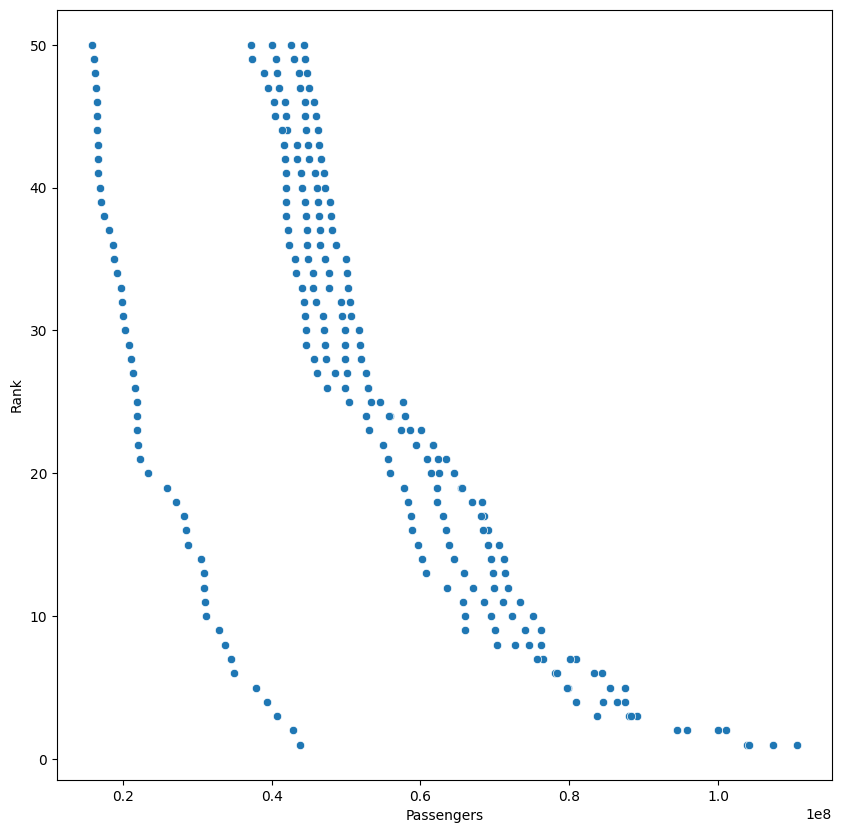

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Passengers', y='Rank', data=df)

<AxesSubplot: xlabel='Passengers', ylabel='Year'>

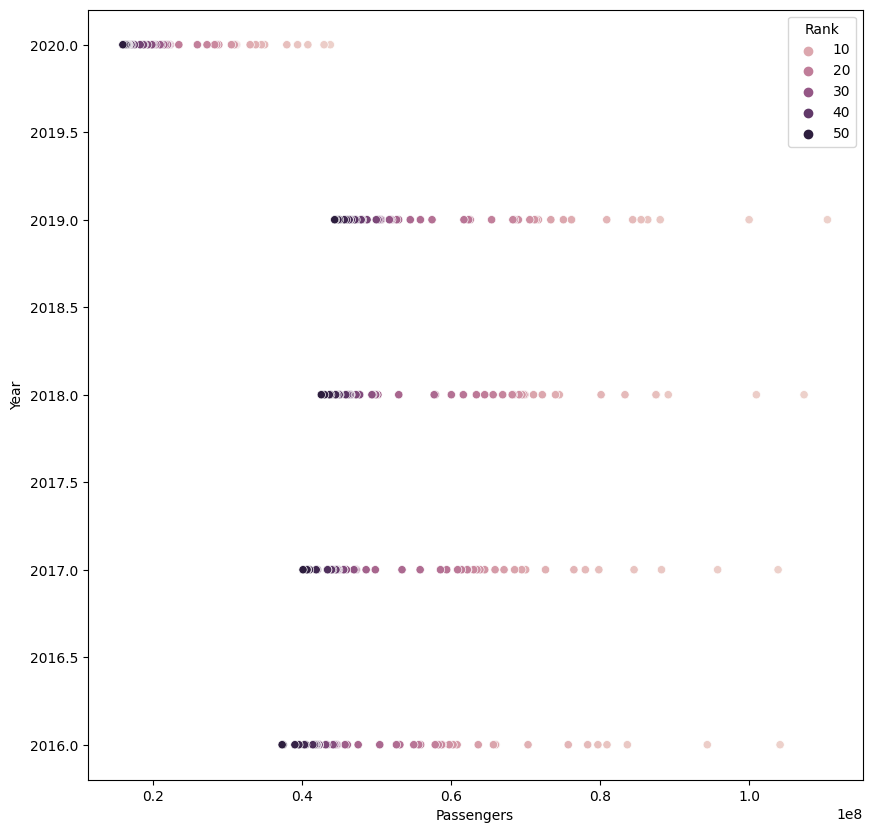

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Passengers', y='Year', data=df, hue='Rank')

#### Гистограмма

<AxesSubplot: xlabel='Passengers', ylabel='Count'>

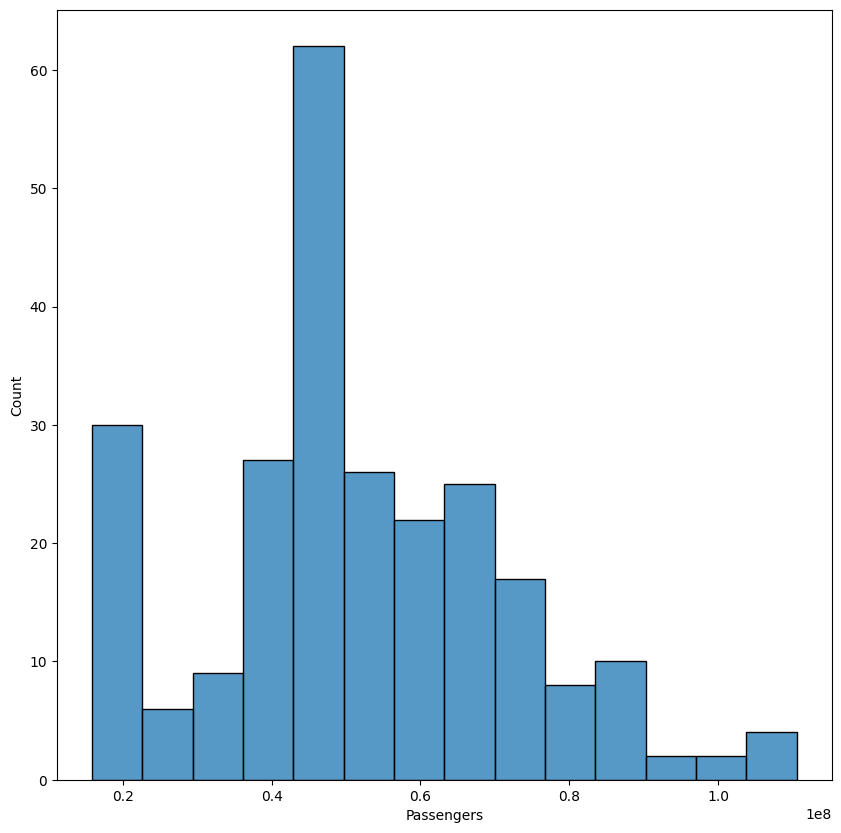

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df['Passengers'])

#### Jointplot

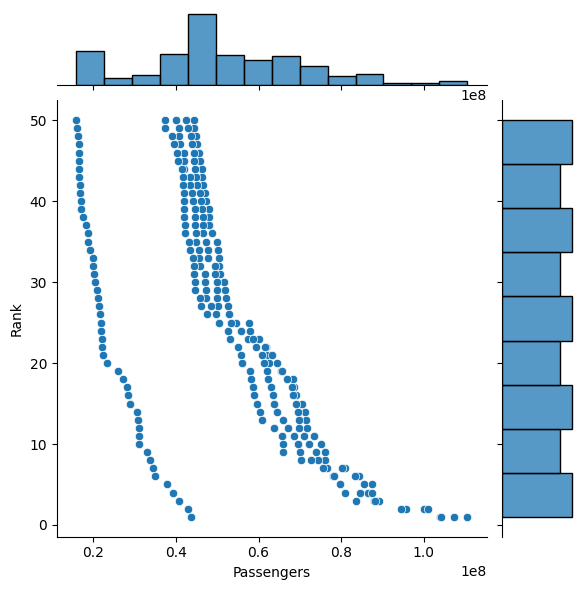

In [15]:
sns.jointplot(x='Passengers', y='Rank', data=df)

Комбинация гистограмм и диаграмм рассеивания.

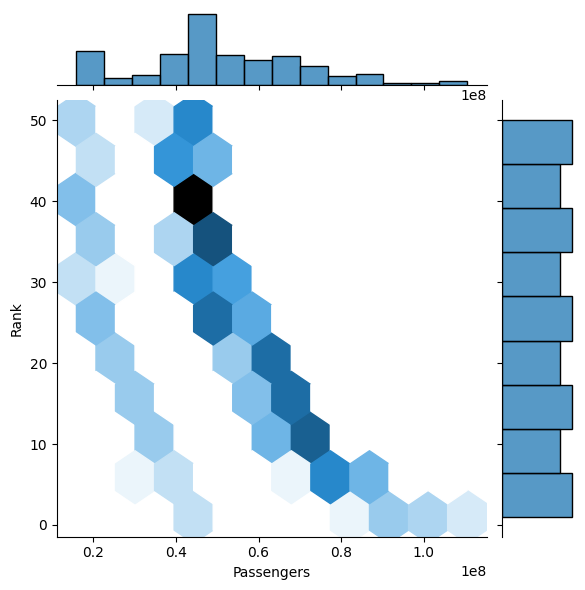

In [16]:
sns.jointplot(x='Passengers', y='Rank', data=df, kind="hex")

#### "Парные диаграммы"

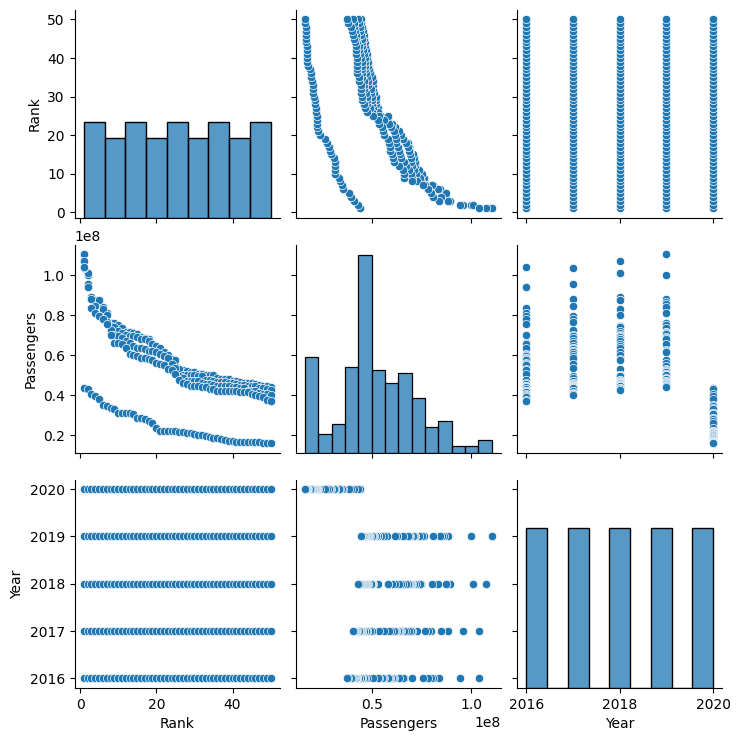

In [17]:
sns.pairplot(df)

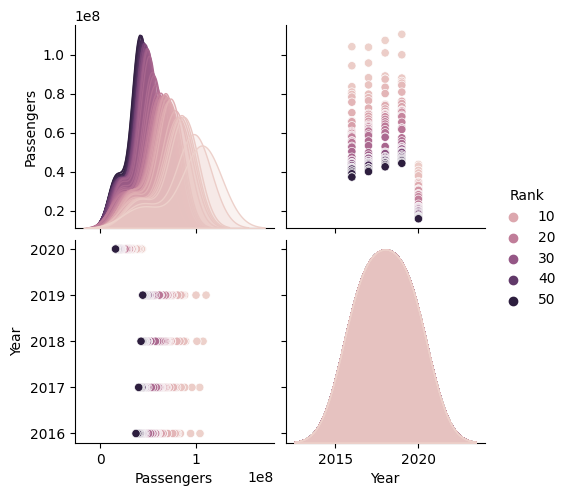

In [18]:
sns.pairplot(df, hue="Rank")

С помощью параметра "hue" сгруппировал по рейтингу "парные диаграммы".

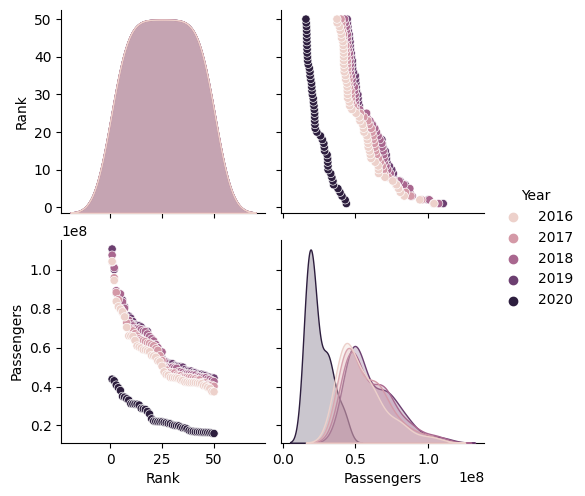

In [19]:
sns.pairplot(df, hue="Year")

Здесь - группировка по годам.

#### "Ящик с усами"

<AxesSubplot: xlabel='Passengers'>

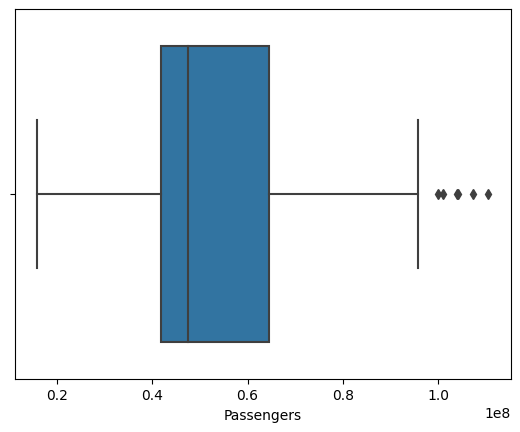

In [20]:
sns.boxplot(x=df['Passengers'])

по оси абсцисс.

<AxesSubplot: ylabel='Passengers'>

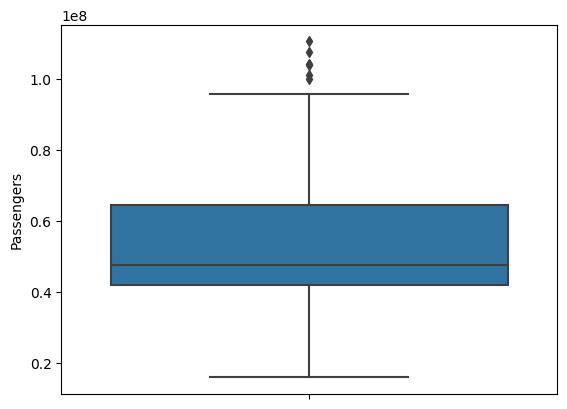

In [21]:
sns.boxplot(y=df['Passengers'])

по оси ординат.

#### Скрипичная диаграмма

<AxesSubplot: xlabel='Passengers'>

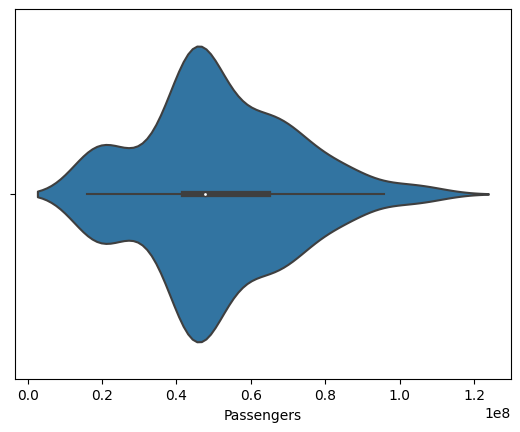

In [22]:
sns.violinplot(x=df['Passengers'])

Скрипичная диаграмма показывает распределение плотности по краям диаграммы.

<AxesSubplot: xlabel='Passengers', ylabel='Count'>

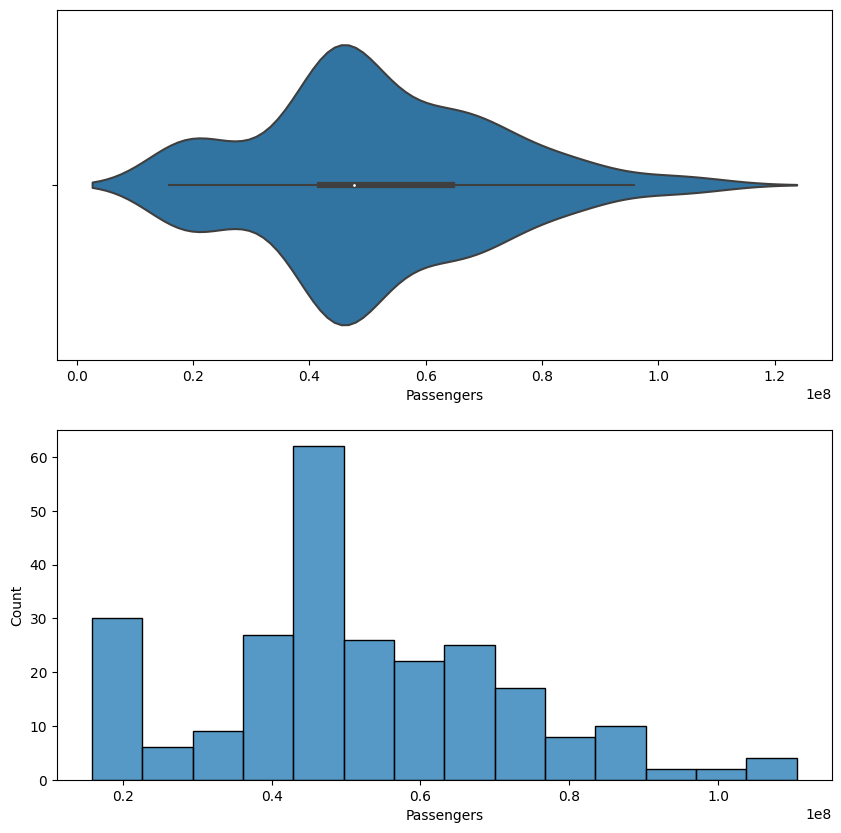

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['Passengers'])
sns.histplot(df['Passengers'])

Из приведенных графиков видно, что скрипичная диаграмма действительно показывает распределение плотности.

<AxesSubplot: xlabel='Year', ylabel='Passengers'>

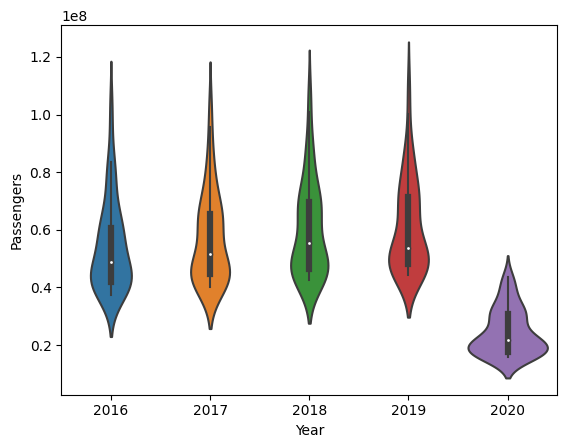

In [24]:
sns.violinplot(x='Year', y='Passengers', data=df)

Распределение параметра Passengers сгруппированные по Year.

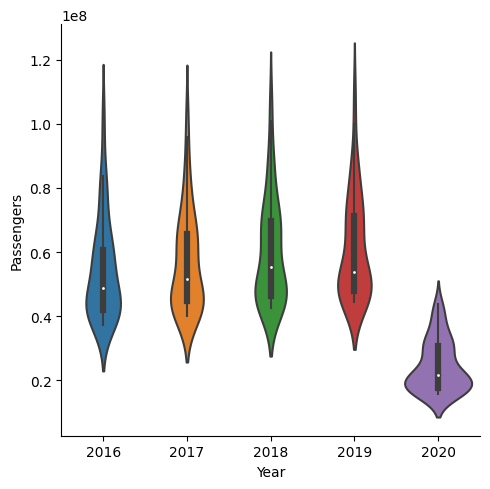

In [25]:
sns.catplot(y='Passengers', x='Year', data=df, kind="violin", split=True)

### 4) Информация о корреляции признаков

In [26]:
df.corr()

C:\Users\79626\AppData\Local\Temp\ipykernel_12816\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Passengers,Year
Rank,1.000000e+00,-0.661542,4.914948e-14
Passengers,-6.615416e-01,1.000000,-3.970435e-01
Year,4.914948e-14,-0.397044,1.000000e+00


##### Коэффициент корреляции Пирсона

In [27]:
df.corr(method='pearson')

C:\Users\79626\AppData\Local\Temp\ipykernel_12816\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Rank,Passengers,Year
Rank,1.000000e+00,-0.661542,4.914948e-14
Passengers,-6.615416e-01,1.000000,-3.970435e-01
Year,4.914948e-14,-0.397044,1.000000e+00


C:\Users\79626\AppData\Local\Temp\ipykernel_12816\1202616348.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')


<AxesSubplot: >

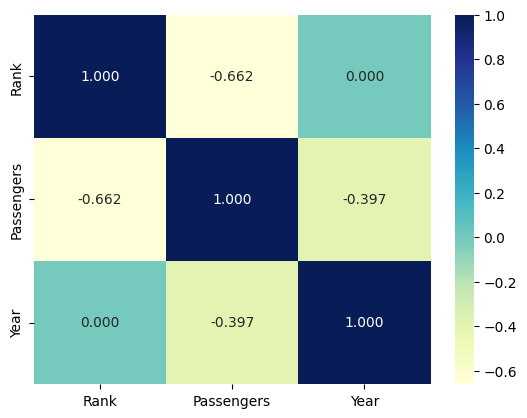

In [28]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

C:\Users\79626\AppData\Local\Temp\ipykernel_12816\2908733683.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')


<AxesSubplot: >

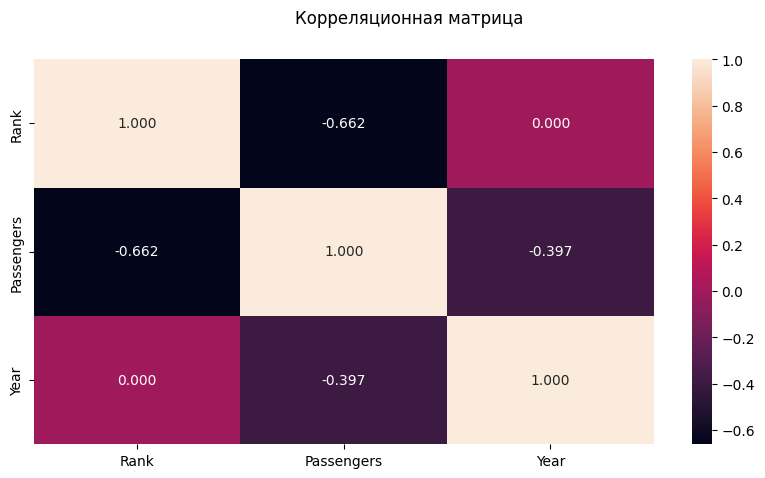

In [29]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')